# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [3]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [14]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
#fraud = pd.write_csv("card_transdata.csv")
fraud.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

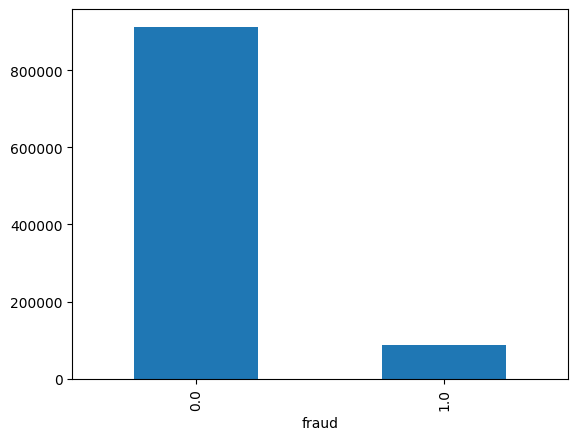

In [ ]:
#1
is_fraud = fraud["fraud"].value_counts()
is_fraud.plot(kind="bar")
plt.show()

In [ ]:
#yes, clearly there's an in imbalance in the (force) data

In [6]:
features = fraud.drop(columns="fraud")
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [10]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
log_reg.score(X_test_scaled, y_test)

0.958516

In [ ]:
#it's an amazing score! probably, too good due to the imbalance

In [17]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    227996
         1.0       0.89      0.60      0.72     22004

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [ ]:
# the recall of 0.60 for recall in the cat=1.0 shows the model is not very good at labeling fraudulent transactions as actually fraudulent

### 4. Oversampling

In [25]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [26]:
train["fraud"] = y_train.values

In [27]:
train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.128824,-0.215143,-0.098808,0.366204,-0.734505,-0.334352,0.732959,0.0
1,0.488774,-0.109735,-0.132935,0.366204,1.361461,-0.334352,0.732959,0.0
2,0.344876,-0.213849,0.437723,0.366204,1.361461,-0.334352,0.732959,0.0
3,-0.378619,-0.037492,0.357833,0.366204,1.361461,-0.334352,-1.364333,0.0
4,-0.255945,0.552620,2.898404,0.366204,-0.734505,2.990859,0.732959,0.0


In [28]:
train.shape

(750000, 8)

In [29]:
fraud = train[train["fraud"] == 1]
not_fraud = train[train["fraud"] == 0]

In [30]:
display(fraud)
display(not_fraud)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
29,4.058703,-0.172635,0.311268,0.366204,-0.734505,-0.334352,0.732959,1.0
47,-0.229497,0.097138,3.700990,0.366204,-0.734505,-0.334352,0.732959,1.0
63,0.155752,-0.152322,1.112625,0.366204,-0.734505,-0.334352,0.732959,1.0
67,-0.306636,-0.165808,2.494941,0.366204,-0.734505,-0.334352,0.732959,1.0
69,-0.053030,-0.201641,12.573758,0.366204,1.361461,-0.334352,0.732959,1.0
...,...,...,...,...,...,...,...,...
749915,-0.256308,-0.212401,1.587160,0.366204,1.361461,-0.334352,0.732959,1.0
749932,5.614255,-0.013179,-0.009418,0.366204,-0.734505,-0.334352,0.732959,1.0
749959,-0.264048,0.620452,3.831848,0.366204,-0.734505,-0.334352,0.732959,1.0
749970,8.610260,-0.112875,0.582144,0.366204,-0.734505,-0.334352,0.732959,1.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.128824,-0.215143,-0.098808,0.366204,-0.734505,-0.334352,0.732959,0.0
1,0.488774,-0.109735,-0.132935,0.366204,1.361461,-0.334352,0.732959,0.0
2,0.344876,-0.213849,0.437723,0.366204,1.361461,-0.334352,0.732959,0.0
3,-0.378619,-0.037492,0.357833,0.366204,1.361461,-0.334352,-1.364333,0.0
4,-0.255945,0.552620,2.898404,0.366204,-0.734505,2.990859,0.732959,0.0
...,...,...,...,...,...,...,...,...
749995,-0.166479,-0.185022,-0.177638,0.366204,1.361461,-0.334352,0.732959,0.0
749996,-0.278584,-0.211957,0.034195,0.366204,-0.734505,-0.334352,0.732959,0.0
749997,0.220099,-0.031853,0.494295,0.366204,-0.734505,2.990859,0.732959,0.0
749998,-0.203304,-0.166887,-0.450831,0.366204,-0.734505,-0.334352,0.732959,0.0


In [32]:
from sklearn.utils import resample

yes_fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(not_fraud),
                                    random_state=0)

In [36]:
yes_fraud_oversampled.shape

(684601, 8)

In [35]:
not_fraud.shape

(684601, 8)

In [38]:
train_over = pd.concat([yes_fraud_oversampled, not_fraud])
train_over.shape

(1369202, 8)

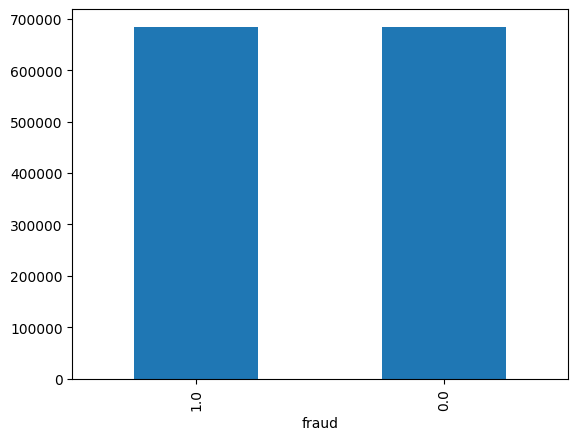

In [40]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [41]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [43]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227996
         1.0       0.57      0.95      0.72     22004

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



c:\Users\abarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# recall is now 0.95 for cat=1.0, this means this model is very good at labeling fraudulent transactions

### 5. Undersampling

In [45]:
not_fraud_undersampled = resample(not_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
not_fraud_undersampled.shape

(65399, 8)

In [47]:
train_under = pd.concat([not_fraud_undersampled, fraud])
train_under.shape

(130798, 8)

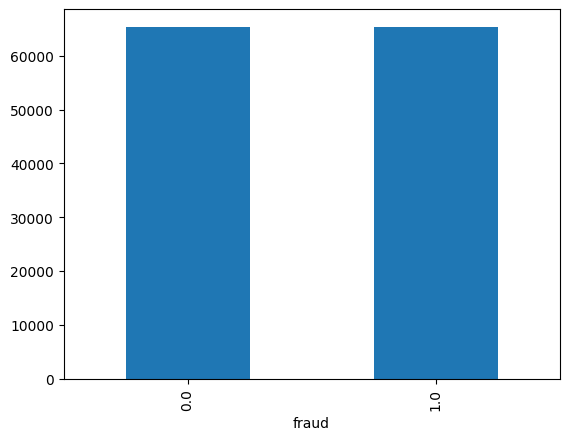

In [48]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [49]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [51]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\abarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227996
         1.0       0.58      0.95      0.72     22004

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
# similar results than oversampling

### 6. SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [57]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [58]:
y_train_sm.value_counts()

fraud
0.0    684601
1.0    684601
Name: count, dtype: int64

In [59]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [60]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    227996
         1.0       0.57      0.95      0.72     22004

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
# no significant improvement with SMOTE